In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

%matplotlib inline 
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)

# T-Test: research questions

### 1. New interactive tutorial for a videogame - does it help increasing the playing time?
- 1000 users = show them the new tutorial  (experimental group) 
- 1000 users = show them the current tutorial (control group)  
- Measurement after 2 month
- metric = how many hours they played 
  
*NOTE: this is an a/b test!*

In [2]:
np.random.seed(45)

# These are the results of the test.
# I'm generating the results because I don't have the real data.
exp = np.random.normal(loc=100,scale=10,size=1000)
placebo = np.random.normal(loc=92,scale=9,size=1000)

In [3]:
print("experimental mean: {} hours".format(round(np.mean(exp),1)))
print("placebo mean: {} hours".format(round(np.mean(placebo),1)))
print("experimental - placebo: {} hours".format(round(np.mean(exp)-np.mean(placebo),1)))

experimental mean: 99.7 hours
placebo mean: 92.1 hours
experimental - placebo: 7.6 hours


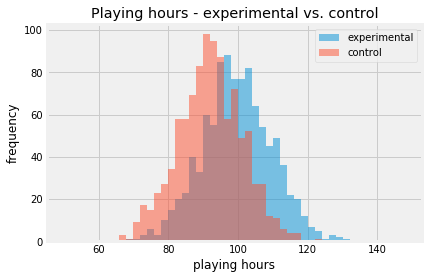

In [4]:
val,bins,_ = plt.hist(exp, bins=range(50,150,2), alpha=0.5, label='experimental')
plt.hist(placebo, bins=range(50,150,2), alpha=0.5, label='control')
plt.legend()
plt.title('Playing hours - experimental vs. control')
plt.xlabel('playing hours')
plt.ylabel('frequency')
plt.show()

In [5]:
stats.ttest_ind(exp,placebo)

Ttest_indResult(statistic=17.824545920407214, pvalue=4.5303019581046615e-66)

Conclusions:
- p<0.05
- we can reject the null hypothesis (H0)
- the samples don't come from the same population
- we can say there is a statistically significant difference between the two groups
- we can say the new tutorial works better than the previous

#  
#  
#  

### 2. New organic fertilizer - does it help growing bigger potatoes?
- 200 potatoes with new fertilizer (experimental group) 
- 200 potatoes with old fertilizer (control group)  
- Measurement after the crop
- metric = weight of the potatoes

In [6]:
np.random.seed(45)

exp = np.random.normal(loc=120,scale=5,size=100)
placebo = np.random.normal(loc=118,scale=4,size=100)

In [7]:
print("experimental mean: {}g".format(round(np.mean(exp),1)))
print("placebo mean: {}g".format(round(np.mean(placebo),1)))
print("experimental - placebo: {}g".format(round(np.mean(exp)-np.mean(placebo),1)))

experimental mean: 119.3g
placebo mean: 118.3g
experimental - placebo: 1.0g


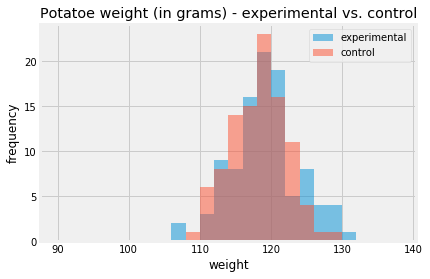

In [8]:
bins = range(90,140,2)
val,bins,_ = plt.hist(exp, bins=bins, alpha=0.5, label='experimental')
plt.hist(placebo, bins=bins, alpha=0.5, label='control')
plt.legend()
plt.title('Potatoe weight (in grams) - experimental vs. control')
plt.xlabel('weight')
plt.ylabel('frequency')
plt.show()

In [9]:
stats.ttest_ind(exp,placebo)

Ttest_indResult(statistic=1.6243509879386842, pvalue=0.10589174378872597)

Conclusions:
- p>0.05
- we cannot reject the null hypothesis (H0)
- the samples come from the same population
- we cannot say there is a statistically significant difference between the two groups
- we cannot say the new fertilizer is working

#  
#  
#  

# Chi-squared

### 1. Singapore: is EvilCorp a racist company? Idea: there is a difference in the races between managers and executives.
- take a sample of the managers: what races?
- take a sample of the executives: what races?

In [10]:
# chinese, malay, indian, expat
managers = [60, 20, 10, 8] # those values are not raw like for t-test!
executives = [55, 17, 8, 20] 

In [11]:
observations = [managers, executives]

In [12]:
chi2, p, dof, ex = stats.chi2_contingency(observations, correction=False)

In [13]:
chi2,p

(5.806104291641116, 0.12143432222389007)

Conclusions:
- p>0.05
- we cannot reject the null hypothesis (H0)
- the samples come from the same population
- we cannot say there is a statistically significant difference between the two groups
- we cannot say the company is racist

#  
#  
#  

### 2. Pokmon cards: are they selling the same type of packets in china and in us?
Cards can be rare, semi-rare, common.
- Take 10 card packs in us: total 100 cards
- Take 10 card packs in china: total 100 cards

In [14]:
# rare, semi-rare, common
china = [10,20,70] 
us = [5, 10, 85]

In [15]:
observations = [china,us]

In [16]:
chi2, p, dof, ex = stats.chi2_contingency(observations, correction=False)

In [17]:
chi2,p

(6.451612903225806, 0.03972373338644102)

Conclusion:
- p<0.05
- we can reject the null hypothesis (H0)
- the samples come from the different populations
- we can say there is a statistically significant difference between the two groups
- we can say packets in china and us are different